#  Udacity write a data science blog post project


## Pamoli Dutta

## Introduction:
In this project, using Python and its libraries, we will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. <br/>
The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.

## Gathering the data:
The project instruction illustrates te proedures to collate the required datasets. So first, we'll gather all available data.

In [5]:
#Importing necessary libraries
import tweepy 
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from functools import reduce
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Inserting consumer and access credentials
consumer_key = 'xxxx'
consumer_secret = 'xxxx'
access_token = 'xxxx'
access_secret = 'xxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [76]:
#Loading the given archive data into a dataframe
archive_data=pd.read_csv("twitter-archive-enhanced.csv")

#Looking at a snapshot of the dataset
archive_data.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [7]:
#Extracting the twitter ids required to query data from Twitter's database
tweet_ids = archive_data.tweet_id.values
len(tweet_ids)

2356

In [8]:
#Adding each tweet to a new line in 'tweet_json.txt'
with open('tweet_json.txt', 'w', encoding='utf8') as file:
    for i in tweet_ids:
        try:
            t = api.get_status(i, tweet_mode='extended')
            json.dump(t._json, file)
            file.write('\n')
        except tweepy.TweepError as e:
            print("Fail")


Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail


In [9]:
#Reading 'tweet_json.txt'
tweet = []

file=open('tweet_json.txt', "r")

for i in file:
    try:
        t = json.loads(i)
        tweet.append(t)
    except:
        continue
        
file.close()

In [10]:
#Selecting only the required variables and putting it into a dataframe
additional_data = pd.DataFrame()

additional_data['tweet_id'] = list(map(lambda t: t['id'], tweet))
additional_data['retweets'] = list(map(lambda t: t['retweet_count'], tweet))
additional_data['favorites'] = list(map(lambda t: t['favorite_count'], tweet))

In [11]:
#Looking at a snapshot of the dataset
additional_data.head(10)

,tweet_id,retweets,favorites
0,892420643555336193,7868,36924
1,892177421306343426,5843,31773
2,891815181378084864,3855,23948
3,891689557279858688,8030,40251
4,891327558926688256,8697,38448
5,891087950875897856,2893,19346
6,890971913173991426,1910,11274
7,890729181411237888,17574,62270
8,890609185150312448,3993,26613
9,890240255349198849,6835,30454


## Assesing the data:
Now that we have all the data, we can go ahead and assess the quality and other aspects of the data.

In [12]:
#Looking into basic properties of the archive data
archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
#Looking into basic properties of the additional data
additional_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id     2333 non-null int64
retweets     2333 non-null int64
favorites    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


Next we'll look at the ratings in archive dataset.

In [14]:
archive_data['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
archive_data['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
#The archive_data contains columns as retweet_id which implies presence of retweets in the data. We'll check if that is true or all the values are NaN.
archive_data["retweeted_status_id"].unique()

array([           nan, 8.87473957e+17, 8.86053734e+17, 8.30583321e+17,
       8.78057613e+17, 8.78281511e+17, 6.69000397e+17, 8.76850772e+17,
       8.66334965e+17, 8.68880398e+17, 8.73213776e+17, 8.72657584e+17,
       8.41077006e+17, 8.59196979e+17, 8.68552279e+17, 8.65013420e+17,
       8.66450706e+17, 8.37820168e+17, 8.63062472e+17, 8.06629075e+17,
       8.60563773e+17, 8.60914485e+17, 7.61672994e+17, 8.39549326e+17,
       8.57061112e+17, 8.44704788e+17, 8.56330159e+17, 8.42163533e+17,
       8.55122533e+17, 8.31650052e+17, 8.29374342e+17, 8.48289382e+17,
       8.33124695e+17, 8.32369877e+17, 8.47971000e+17, 7.56288534e+17,
       7.73308824e+17, 8.07106841e+17, 8.17423860e+17, 8.40632337e+17,
       6.67152164e+17, 8.39289919e+17, 8.38905981e+17, 7.83839966e+17,
       8.20749717e+17, 8.37011345e+17, 8.36648149e+17, 8.17827839e+17,
       7.86963064e+17, 8.35264099e+17, 7.53039831e+17, 8.29501995e+17,
       8.32434358e+17, 8.32766382e+17, 7.86709083e+17, 7.93286476e+17,
      

Looks like there are plenty of retweets in the data.

In [17]:
#The source column contains the sources in the form of url. We can check how many types are there.
archive_data["source"].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [18]:
#Checking for how many ids the additional data are missing
len(archive_data[~archive_data['tweet_id'].isin(additional_data['tweet_id'])])

23

In [19]:
#We've noticed, in the snapshot of archive data, some of the dog names are listed as 'none', 
#which can't be a valid dog name.
#Such names are listed in lower case mainly. So, next we'll check all the names in lower cases.
archive_data['name_check']=archive_data['name'].str.islower()
stopwords=list(archive_data[archive_data['name_check']==True]['name'].unique())
stopwords


['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'mad',
 'an',
 'very',
 'just',
 'my',
 'his',
 'actually',
 'getting',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

Apart from 'none', we see names like 'a','an','the','quite','not','one','just','my','his','this','all' which seem unusual. However, some of the names like 'life', 'light' are plausible.

In [20]:
stopwords.remove('life')
stopwords.remove('light')
stopwords.remove('space')
stopwords.append('None')

In [21]:
stopwords

['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'mad',
 'an',
 'very',
 'just',
 'my',
 'his',
 'actually',
 'getting',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'None']

Next, we'll list down all the issues we primarily found in these datasets.

### **Quality issues:**<br/>
- Dog names contain invalid names.
- 'Tweet_id's are stored as integers, ids are more suited to be strings.
- The values for 'in_reply_to_status_id','in_reply_to_user_id' variables are mostly NaN.
- The 'rating_numerator' and 'rating_denominator' are stored as integers, but rating can take any value and hence should be a float.
- All 'timestamp' variables should be a datetime object, it is stored as a string.
- Retweets and favourites are supposed to be discreet values which are stored as floats here.
- It doesn't make much sense to use retweets since they are just same information repeated. So, we'll remove the retweets.
- The source can be extracted from the source column.
- We see rating denominators which are more than 10. We can compare them with the text field and get the right values.
- Rating numerators also seem to have some unusual values, we'll compare them with the text field and get the right values.

### **Tidiness issues:**

- In archive data, four columns have been used to represent dog type when it can be summarized in a single column.
- Two variables are defined for ratings, which can be combined into one.
- The additional info can be joined to the original table. There is no need for two seperate tables.
- The columns that are not useful for analysis should be removed.

Now, we'll resolve the issues one by one as follows. Before that, we'll first make copies of each of the datasets.

In [23]:
archive_copy=archive_data.copy()
additional_copy=additional_data.copy()

- **Dog names contain invalid names.**

**Define:** Replace all invalid dog names by 'NaN'

**Code:**

In [24]:
import numpy as np
names_new=archive_copy['name'].replace(stopwords, np.nan)

**Test:**

In [25]:
names_new

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5            NaN
6            Jax
7            NaN
8           Zoey
9         Cassie
10          Koda
11         Bruno
12           NaN
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22           NaN
23        Canela
24           NaN
25           NaN
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326         NaN
2327         NaN
2328         NaN
2329         NaN
2330         NaN
2331         NaN
2332         NaN
2333         NaN
2334         NaN
2335         NaN
2336         NaN
2337         NaN
2338         NaN
2339         NaN
2340         NaN
2341         NaN
2342         NaN
2343         NaN
2344         NaN
2345         NaN
2346         NaN
2347         NaN
2348         NaN
2349         NaN
2350         NaN
2351         NaN
2352         NaN
2353         N

The new variable doesn't contain the invalid names anymore.

In [26]:
archive_copy['name']=names_new

- **'Tweet_id's are stored as integers, ids are more suited to be strings.**

**Define:** Convert all the ids from integers to srings.

**Code:**

In [27]:
#Archive table
archive_copy["tweet_id"] = archive_copy["tweet_id"].astype(str)
archive_copy["in_reply_to_status_id"] = archive_copy["in_reply_to_status_id"].astype(str)
archive_copy["in_reply_to_user_id"] = archive_copy["in_reply_to_user_id"].astype(str)
archive_copy["retweeted_status_id"] = archive_copy["retweeted_status_id"].astype(str)
archive_copy["retweeted_status_user_id"] = archive_copy["retweeted_status_user_id"].astype(str)

#Additional table
additional_copy["tweet_id"] = additional_copy["tweet_id"].astype(str)


**Test:**

In [28]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1505 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
name_check                   

In [29]:
additional_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id     2333 non-null object
retweets     2333 non-null int64
favorites    2333 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In every table, 'id's are now strings.

- The values for 'in_reply_to_status_id','in_reply_to_user_id' variables are mostly NaN.

Now, these ids are unrecoverable. Let's check what percentage of data is NaN. 

In [30]:
archive_copy["in_reply_to_status_id"].value_counts()[[0]]

nan    2278
Name: in_reply_to_status_id, dtype: int64

In [31]:
archive_copy["in_reply_to_user_id"].value_counts()[[0]]

nan    2278
Name: in_reply_to_user_id, dtype: int64

In [32]:
archive_copy["retweeted_status_id"].value_counts()[[0]]

nan    2175
Name: retweeted_status_id, dtype: int64

In [33]:
archive_copy["retweeted_status_user_id"].value_counts()[[0]]

nan    2175
Name: retweeted_status_user_id, dtype: int64

A huge percentage of data is missing for these variables. So these variables variables are not of much use in the analysis. We'll drop these in the tidiness section. 

- The 'rating_numerator' and 'rating_denominator' are stored as integers, but rating can take any value and hence should be a float.

**Define:** Convert the ratings from integers to floats.

**Code:**

In [34]:
archive_copy["rating_numerator"] = archive_copy["rating_numerator"].astype(float)
archive_copy["rating_denominator"] = archive_copy["rating_denominator"].astype(float)

**Test:**

In [35]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          1505 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
name_check               

The rating variables are converted to float.

- All 'timestamp' variables should be a datetime object, it is stored as a string.

**Define:** Convert timestamps to a datetime object.

**Code:**

In [36]:
archive_copy["timestamp"] = pd.to_datetime(archive_copy["timestamp"])
archive_copy["retweeted_status_timestamp"] = pd.to_datetime(archive_copy["retweeted_status_timestamp"])

**Test:**

In [37]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          1505 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
name_chec

The timestamps are converted to datetime objects.

- Retweets and favourites are supposed to be discreet values which are stored as floats here.

**Define:** Convert retweets and favourites to integers.

**Code:**

In [38]:
additional_copy["retweets"] = additional_copy["retweets"].astype(float)
additional_copy["favorites"] = additional_copy["favorites"].astype(float)

**Test:**

In [39]:
additional_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id     2333 non-null object
retweets     2333 non-null float64
favorites    2333 non-null float64
dtypes: float64(2), object(1)
memory usage: 54.8+ KB


Favorites and rerweets are converted to floats.

- It doesn't make much sense to use retweets since they are just same information repeated. So, we'll remove the retweets.

**Define:** Keep only those data points where retweeted_status_ids are null.

**Code:**

In [40]:
archive_copy = archive_copy[archive_copy['retweeted_status_id']=='nan']

**Test:**

In [41]:
archive_copy['retweeted_status_id'].unique()

array(['nan'], dtype=object)

Retweets are removed successfully.

- The source can be extracted from the source column.

**Define:** extract source information from the source column.

**Code:**

In [42]:
archive_copy['source'] = archive_copy['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

**Test:**

In [43]:
archive_copy['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

In [44]:
archive_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,name_check
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,False
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,False
2,891815181378084864,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,False
3,891689557279858688,nan,nan,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,False
4,891327558926688256,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,False
5,891087950875897856,nan,nan,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,nan,nan,NaT,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,None,None,None,None,False
6,890971913173991426,nan,nan,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,nan,nan,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,None,None,None,None,False
7,890729181411237888,nan,nan,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,nan,nan,NaT,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,None,None,None,None,False
8,890609185150312448,nan,nan,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,nan,nan,NaT,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,None,None,None,None,False
9,890240255349198849,nan,nan,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,nan,nan,NaT,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,None,None,None,False


- We see rating denominators which are more than 10. We can compare them with the text field and get the right values.

**Define:** Check denominator_ratings with text fields.

**Code:**

In [45]:
pd.set_option("display.max_colwidth",500)

In [46]:
archive_copy[archive_copy["rating_denominator"]>10][["tweet_id","text","rating_numerator","rating_denominator"]]

,tweet_id,text,rating_numerator,rating_denominator
342,832088576586297345,@docmisterio account started on 11/15/15,11.0,15.0
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0


In [47]:
import numpy as np
#Reading the texts and fixing each score


archive_copy.loc[1068, 'rating_numerator'] = 14
archive_copy.loc[1068, 'rating_denominator'] = 10

archive_copy.loc[1165, 'rating_numerator'] = 13
archive_copy.loc[1165, 'rating_denominator'] = 10


archive_copy.loc[1202, 'rating_numerator'] = 11
archive_copy.loc[1202, 'rating_denominator'] = 10


archive_copy.loc[1662, 'rating_numerator'] = 10
archive_copy.loc[1662, 'rating_denominator'] = 10


In [48]:
archive_copy[archive_copy["rating_denominator"]>10][["tweet_id","text","rating_numerator","rating_denominator"]]

,tweet_id,text,rating_numerator,rating_denominator
342,832088576586297345,@docmisterio account started on 11/15/15,11.0,15.0
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0
1598,686035780142297088,"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",4.0,20.0


In the remaining cases, the scores are actually given as it is.

- Rating numerators also seem to have some unusual values, we'll compare them with the text field and get the right values.

**Define:** Compare the values with the text fields.

**Code:**

In [49]:
#We're taking 14 as the cutoff as till 14 there are multiple occurrences,as seen from archive_data.info(), so we assume those can be olausible scores.
archive_copy[archive_copy["rating_numerator"]>14][["tweet_id","text","rating_numerator","rating_denominator"]]

,tweet_id,text,rating_numerator,rating_denominator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17.0,10.0
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420.0,10.0
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666.0,10.0
290,838150277551247360,@markhoppus 182/10,182.0,10.0
291,838085839343206401,@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,15.0,10.0
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960.0,0.0
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10.0


In [50]:
#Reading the texts and fixing each score
archive_copy.loc[516, 'rating_numerator'] = np.nan
archive_copy.loc[516, 'rating_denominator'] = np.nan

archive_copy.loc[695, 'rating_numerator'] = 9.75
archive_copy.loc[695, 'rating_denominator'] = 10

archive_copy.loc[763, 'rating_numerator'] = 11.27
archive_copy.loc[763, 'rating_denominator'] = 10

archive_copy.loc[1712, 'rating_numerator'] = 11.26
archive_copy.loc[1712, 'rating_denominator'] = 10

archive_copy.loc[695, 'rating_numerator'] = 9.75
archive_copy.loc[695, 'rating_denominator'] = 10

**Test:**

In [51]:
archive_copy[archive_copy["rating_numerator"]>14][["tweet_id","text","rating_numerator","rating_denominator"]]

,tweet_id,text,rating_numerator,rating_denominator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17.0,10.0
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420.0,10.0
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666.0,10.0
290,838150277551247360,@markhoppus 182/10,182.0,10.0
291,838085839343206401,@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,15.0,10.0
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960.0,0.0
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10.0
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0


For the rest of the cases, the scores are written as it is.

- In archive data, four columns have been used to represent dog type when it can be summarized in a single column.

First, let's look at all the all available combinations.

In [52]:
archive_copy[["doggo","floofer","pupper","puppo"]].drop_duplicates()

,doggo,floofer,pupper,puppo
0,None,None,None,None
9,doggo,None,None,None
12,None,None,None,puppo
29,None,None,pupper,None
46,None,floofer,None,None
191,doggo,None,None,puppo
200,doggo,floofer,None,None
460,doggo,None,pupper,None


**Define:** Create a dictionary containing the vales of old columns and the new column. Then based on that, replace the four variables in the dataset by a single variable.

In [53]:
#Create one combined variable
archive_copy["stage"]=archive_copy["doggo"]+archive_copy["floofer"]+archive_copy["pupper"]+archive_copy["puppo"]

In [54]:
#Finding all possible different values
archive_copy["stage"].drop_duplicates()

0          NoneNoneNoneNone
9         doggoNoneNoneNone
12        NoneNoneNonepuppo
29       NoneNonepupperNone
46      NoneflooferNoneNone
191      doggoNoneNonepuppo
200    doggoflooferNoneNone
460     doggoNonepupperNone
Name: stage, dtype: object

In [55]:
#Creating a dictionary
stage_dict={"NoneNoneNoneNone":"None","doggoNoneNoneNone":"Doggo","NoneNoneNonepuppo":"Puppo","NoneNonepupperNone":"Pupper","NoneflooferNoneNone":"Floofer",
           "doggoNoneNonepuppo":"Doggo/Puppo","doggoflooferNoneNone":"Doggo/Floofer","doggoNonepupperNone":"Doggo/Pupper"}

In [56]:
#Replacing the combined variable by the new variable and dropping the four original variables
archive_copy=archive_copy.replace({"stage": stage_dict})
archive_copy=archive_copy.drop(["doggo","floofer","pupper","puppo"],axis=1)

**Test:**

In [57]:
archive_copy["stage"].unique()

array(['None', 'Doggo', 'Puppo', 'Pupper', 'Floofer', 'Doggo/Puppo',
       'Doggo/Floofer', 'Doggo/Pupper'], dtype=object)

In [58]:
archive_copy.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,name_check,stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,False,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",nan,nan,NaT,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,False,None


The four stage variables are replaced by one single variable.

- Two variables are defined for ratings, which can be combined into one.

**Define:** Create a new ratings variable and drop the numerator and denominator.

**Code:**

In [59]:
archive_copy["ratings"]=archive_copy["rating_numerator"]/archive_copy["rating_denominator"]

archive_copy=archive_copy.drop(["rating_numerator","rating_denominator"],axis=1)

**Test:**

In [60]:
archive_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'name', 'name_check',
       'stage', 'ratings'],
      dtype='object')

- The additional info can be joined to the original table. There is no need for two seperate tables.

**Define:** Join the two tables based on 'tweet_id'. We would want only those ids for which all the data are present, so we would use inner join.

In [61]:
#Performing inner join
data = [archive_copy,additional_copy]
cleaned_data = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), data)

In [62]:
cleaned_data.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'name', 'name_check',
       'stage', 'ratings', 'retweets', 'favorites'],
      dtype='object')

- The columns that are not useful for analysis should be removed.

**Define:** From the counts we saw the user_id and status_id columns have too less observations to use. So, we would drop them to make the data more compact.

**Code:**

In [63]:
cleaned_data=cleaned_data.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id'],axis=1)

**Test:**

In [64]:
cleaned_data.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_timestamp',
       'expanded_urls', 'name', 'name_check', 'stage', 'ratings', 'retweets',
       'favorites'],
      dtype='object')

## Storing the data:
Next we'll store the combined data in an excel file.

In [65]:
cleaned_data.to_csv("twitter_archive_master.csv")

Now we can use this clean dataset for analysis.

## Analysis and visualization of the data:

First we'll go ahead and look at the summary statistics of the data.

In [66]:
cleaned_data.describe()

,ratings,retweets,favorites
count,2167.000000,2168.000000,2168.000000
mean,inf,2503.058579,8289.289668
std,NaN,4455.168792,12204.663862
min,0.000000,1.000000,51.000000
25%,1.000000,542.000000,1765.000000
50%,1.100000,1196.000000,3744.000000
75%,1.200000,2838.750000,10278.250000
max,inf,79636.000000,159570.000000


We see the metrics retweets and favorites have a huge variation in values.

We have dogs having four stages in the data. We can check the distribution of retweets, favorites and ratings by stages.

(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text xticklabel objects>)

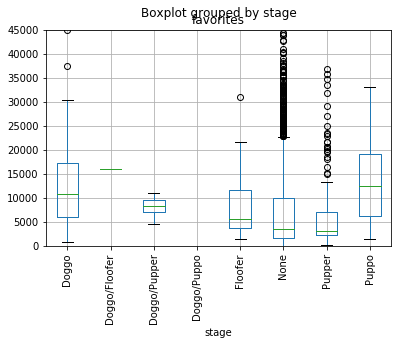

In [67]:
cleaned_data.boxplot("favorites",by="stage")
axes=plt.gca()
axes.set_ylim([0,45000])
plt.xticks(rotation=90)

The plot shows that Floofers have the most varied favorite counts, however, on an average, Puppos are favorited more. 

(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text xticklabel objects>)

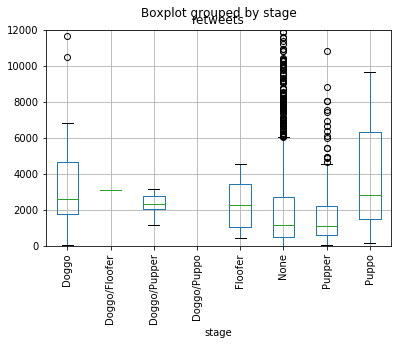

In [68]:
cleaned_data.boxplot("retweets",by="stage")
axes=plt.gca()
axes.set_ylim([0,12000])
plt.xticks(rotation=90)

The plot shows that Puppos have the most varied retweet counts, however, on an average, their retweet count is same as Floofer and Doggo. 

(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text xticklabel objects>)

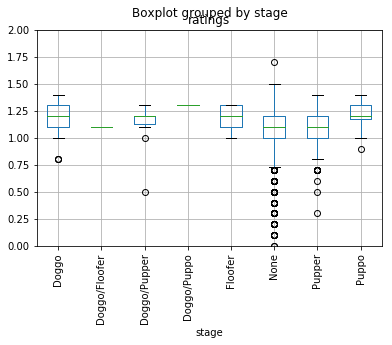

In [69]:
cleaned_data.boxplot("ratings",by="stage")
axes=plt.gca()
axes.set_ylim([0,2])
plt.xticks(rotation=90)

Doggo and Floofer appear to have better ratings than the other stages.

Next, we'll check whether the favorite and retweet counts have changed over the years.

In [70]:
cleaned_data["year_month"]=[i[:7] for i in cleaned_data['timestamp'].astype(str)]#cleaned_data.set_index('timestamp', inplace=True)
cleaned_data["year_month"]=pd.to_datetime(cleaned_data["year_month"])

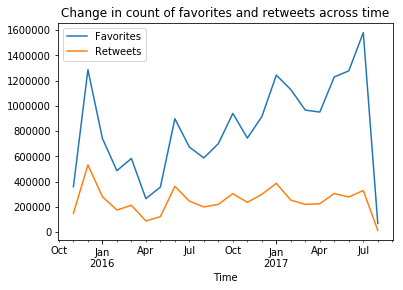

In [71]:
cleaned_data["favorites"].groupby(cleaned_data["year_month"]).sum().plot(label='Favorites')
cleaned_data["retweets"].groupby(cleaned_data["year_month"]).sum().plot(label='Retweets')
plt.xlabel("Time")
plt.title("Change in count of favorites and retweets across time")
plt.legend()  
plt.show()


Both retweets and favourite counts have increased over the years. However, the growth for favorites is steeper than that of retweets.

Both the plots show similar pattern and there might exist a correlation between these two. Next, we'll check for the corelation.

In [72]:
from scipy.stats.stats import pearsonr

pearsonr(cleaned_data["retweets"],cleaned_data["favorites"])

(0.9271678689734848, 0.0)

As expected, there exists a high correlation between retweets and favorites count.

Text(0.5,1,'Scatterplot between retweets and favorites')

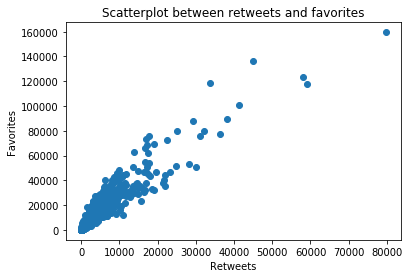

In [73]:
#We can also see the same from the scatter plot, as follows
plt.scatter(x=cleaned_data["retweets"],y=cleaned_data["favorites"])
plt.xlabel("Retweets")
plt.ylabel("Favorites")
plt.title("Scatterplot between retweets and favorites")